# phylogeny of global M. bovis lineages

<div class="alert alert-block alert-info"><b>R Script to draw trees</b> </div>

In [ ]:
library("ape")
library("phytools")
library(seqinr)
library(RColorBrewer)
library('ggtree')

In [3]:
options(repr.plot.width=16, repr.plot.height=12)

In [4]:
setwd('/storage/btbgenie/combined_results/')
meta <- read.table('/storage/btbgenie/combined_results/metadata.csv',sep=',',
                      header=TRUE,row.names=2)
print (length(rownames(meta)))
meta[is.na(meta)] <- "-"
mltree <- read.tree('/storage/btbgenie/combined_results/tree.newick')

meta1 <- read.table('/storage/btbgenie/global_results/metadata.csv',sep=',',
                   header=TRUE,row.names=1)
meta1[is.na(meta1)] <- "-"
mltree1 <- read.tree('/storage/btbgenie/global_results/tree.newick')

meta2 <- read.table('/storage/btbgenie/mbovis_ireland/ireland_metadata.csv',sep=',',
                      header=TRUE,row.names=1)
mltree2 <- read.tree('/storage/btbgenie/all_ireland_results/tree.newick')

[1] 541


In [5]:
length(mltree$tip.label)

[1] 546

In [ ]:
#as.treedata(meta)
ggtree(mltree,  layout='circular') #+ geom_tiplab(size=1, aes(angle=angle))


In [7]:
plot_tree <- function(mltree,samples,type='phylogram',title='',column='SB',cmap="Set1") {
  labels <- samples[mltree$tip.label,][[column]]
  #print(labels)
  #print (samples[mltree$tip.label,])
  labels[is.na(labels)] <- "Other"  
  leglabels <- levels(as.factor(labels))
  n<-length(leglabels)
  colors <- brewer.pal(n = n, name = cmap)
  cols<-setNames(colors[1:length(leglabels)],leglabels)
  print (cols)
  l<-length(labels)
  if (l<70){
      showtip=TRUE
      }
  else {
      showtip=FALSE
  }
  plot(mltree,type=type,cex=.5,label.offset=10, edge.width=.6,show.tip.label=showtip)
  title(title,cex.main= 2)
  cex<-(.3/l*100)
  tiplabels(pie=to.matrix(labels, levels(as.factor(labels))),cex=cex,size=2,piecol=cols)
  add.scale.bar(x=100,lwd=2, cex=1)
  legcolors <- cols[leglabels]
  legend("bottomleft", legend=names(cols), inset=c(-0.1, .2), pch=22, pt.bg=legcolors, pt.cex=2.5, bty='n')
}

In [8]:
colnames(meta)

[1] "X"                    "SB"                   "batch"               
 [4] "county"               "Country"              "filename1"           
 [7] "filename2"            "name1"                "name2"               
[10] "read_length"          "bam_file"             "Run"                 
[13] "BioProject"           "geo_loc_name_country" "Center.Name"         
[16] "Instrument"           "LibraryLayout"        "ReleaseDate"         
[19] "SRA.Study"            "Bytes"                "Bases"               
[22] "Collection_Date"      "code"                 "Country1"            
[25] "county1"              "cc"                   "SB1"                 
[28] "SequenceName"         "ClusterNumber"

In [9]:
x<-c('461','SRR1657063','TB19-003881')
sub<-meta[x,]
#sub
itree <- keep.tip(mltree, x)
plot_tree(randtree,meta,column='county',type='fan')

ERROR: Error in `[.data.frame`(samples, mltree$tip.label, ): object 'randtree' not found


 Monaghan        NI     Other   Wicklow 
"#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" 


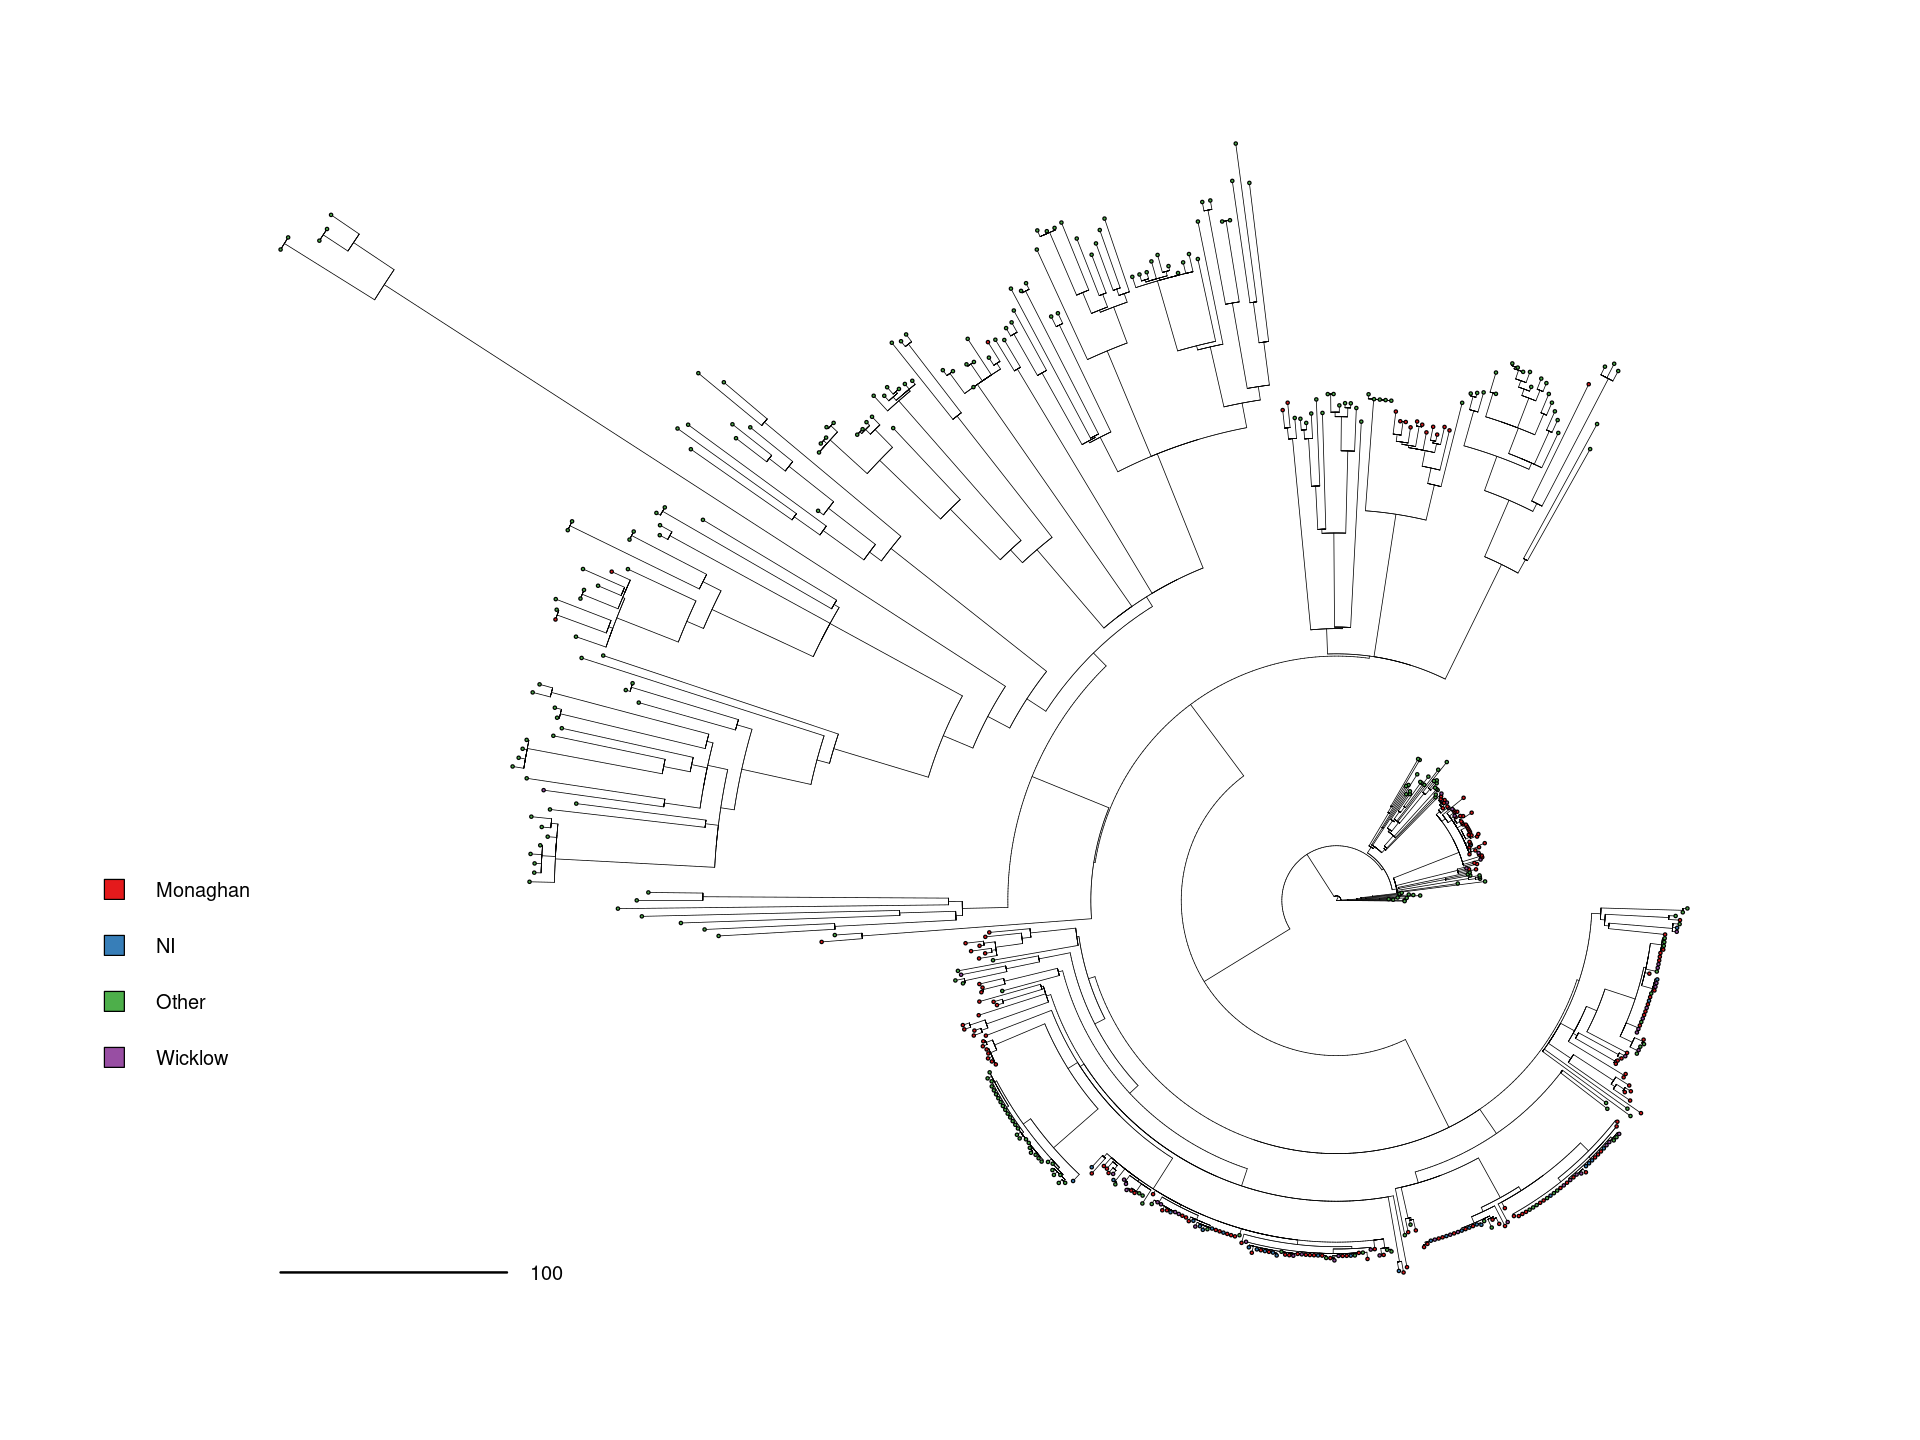

In [10]:
plot_tree(mltree,meta,'fan',column='cc',cmap='Set1')

Warning message in brewer.pal(n = n, name = cmap):
“n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
”


       10        13        14         2         3         4         5         7 
"#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628" "#F781BF" 
        8     Other 
"#999999"        NA 


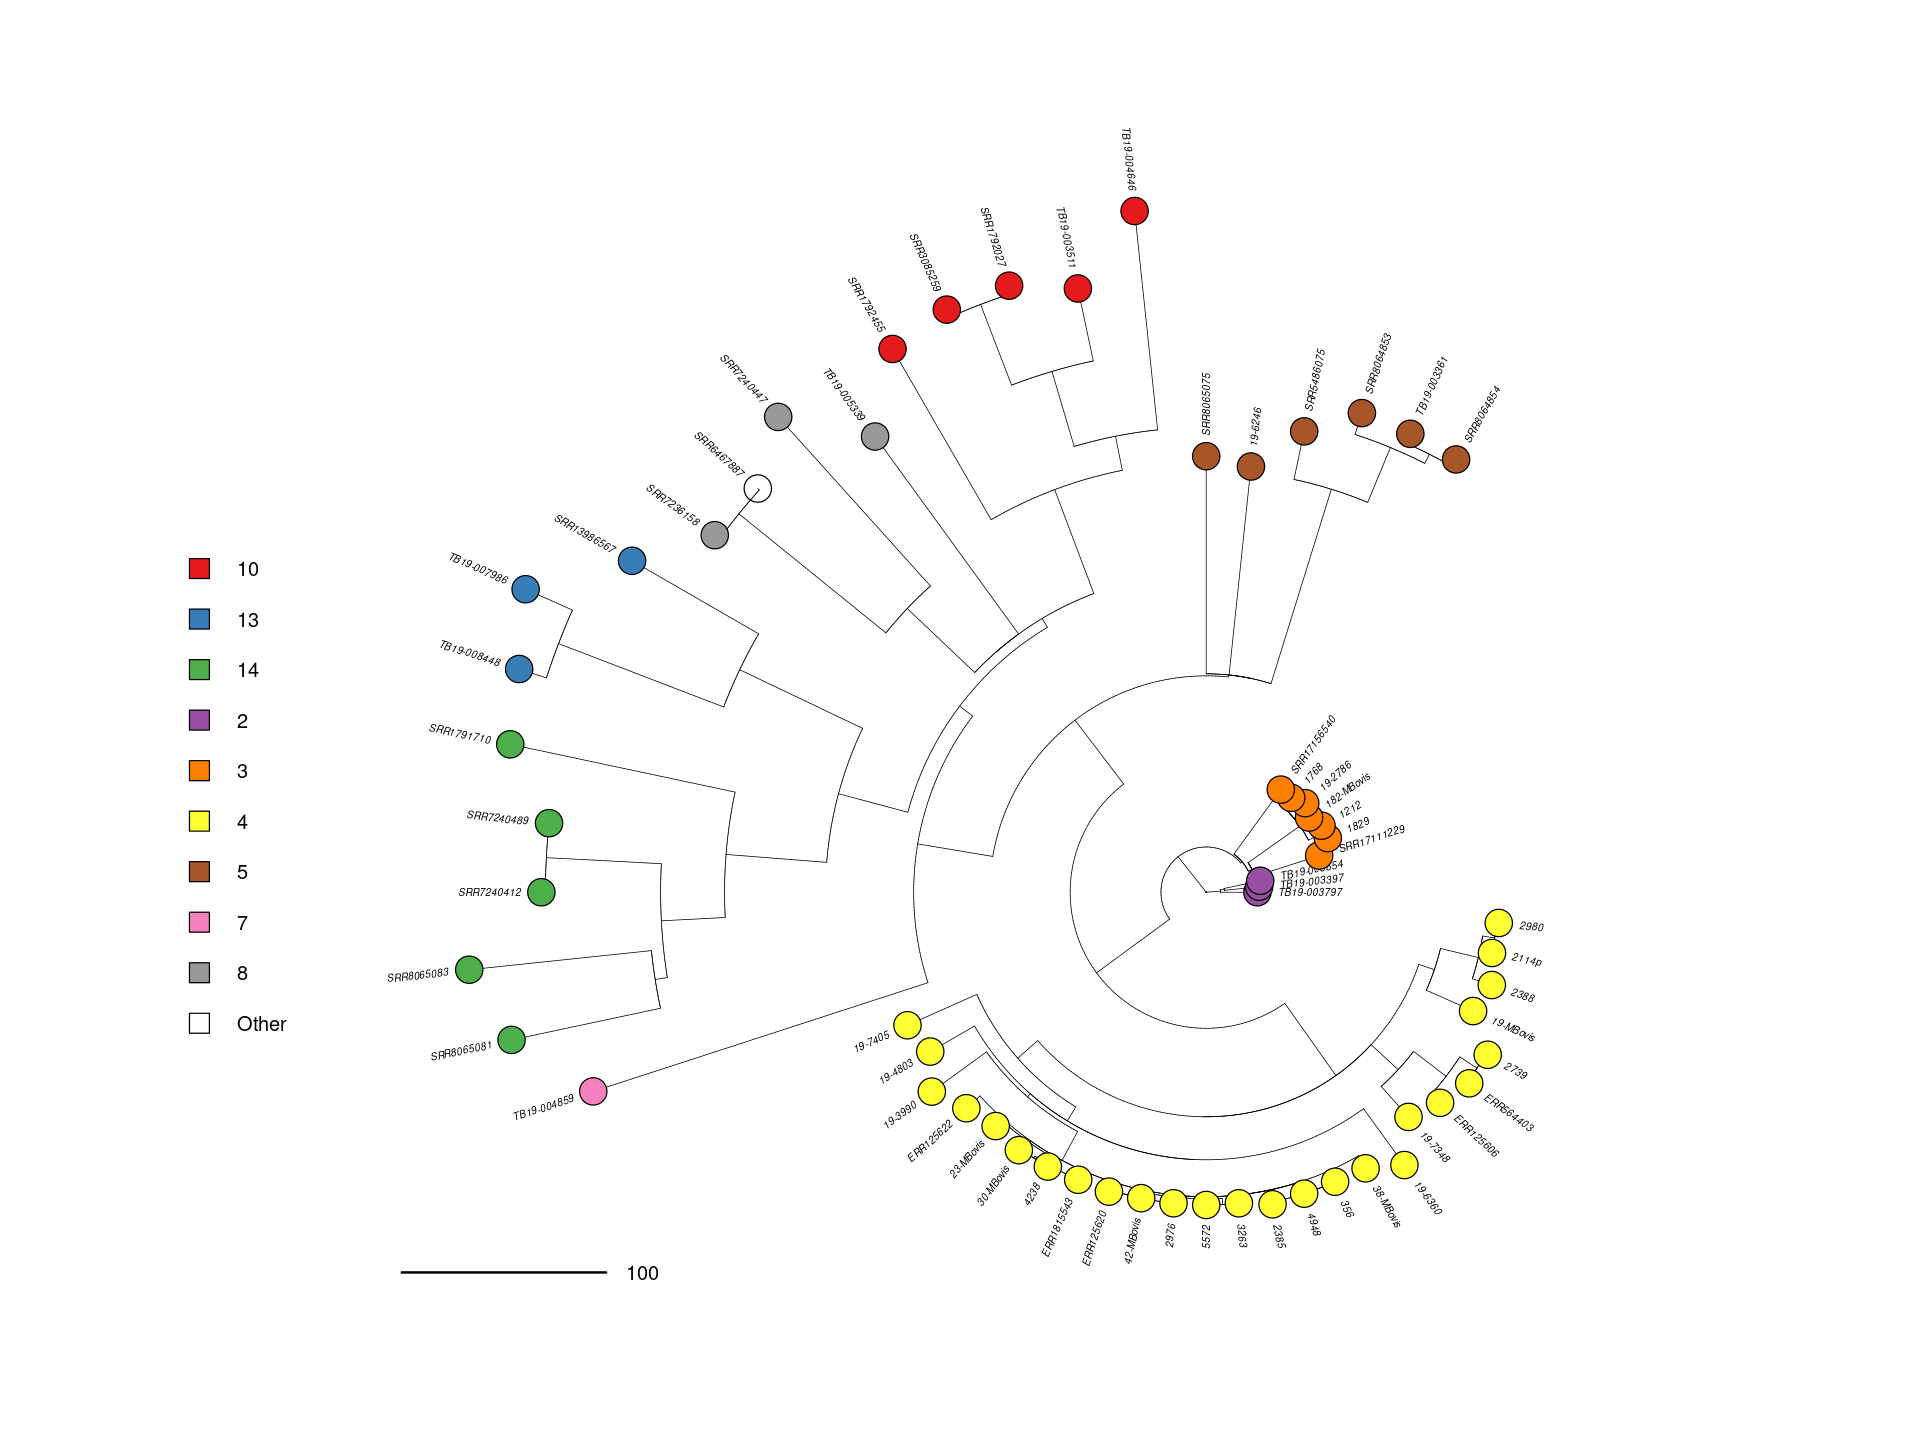

In [11]:
randtips<-sample(mltree$tip.label,60)
randtree <- keep.tip(mltree, randtips)
plot_tree(randtree,meta,column='ClusterNumber',type='fan')

             SB0140    SB0142    SB0975    SB0978    SB0980   Unknown 
"#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628" 


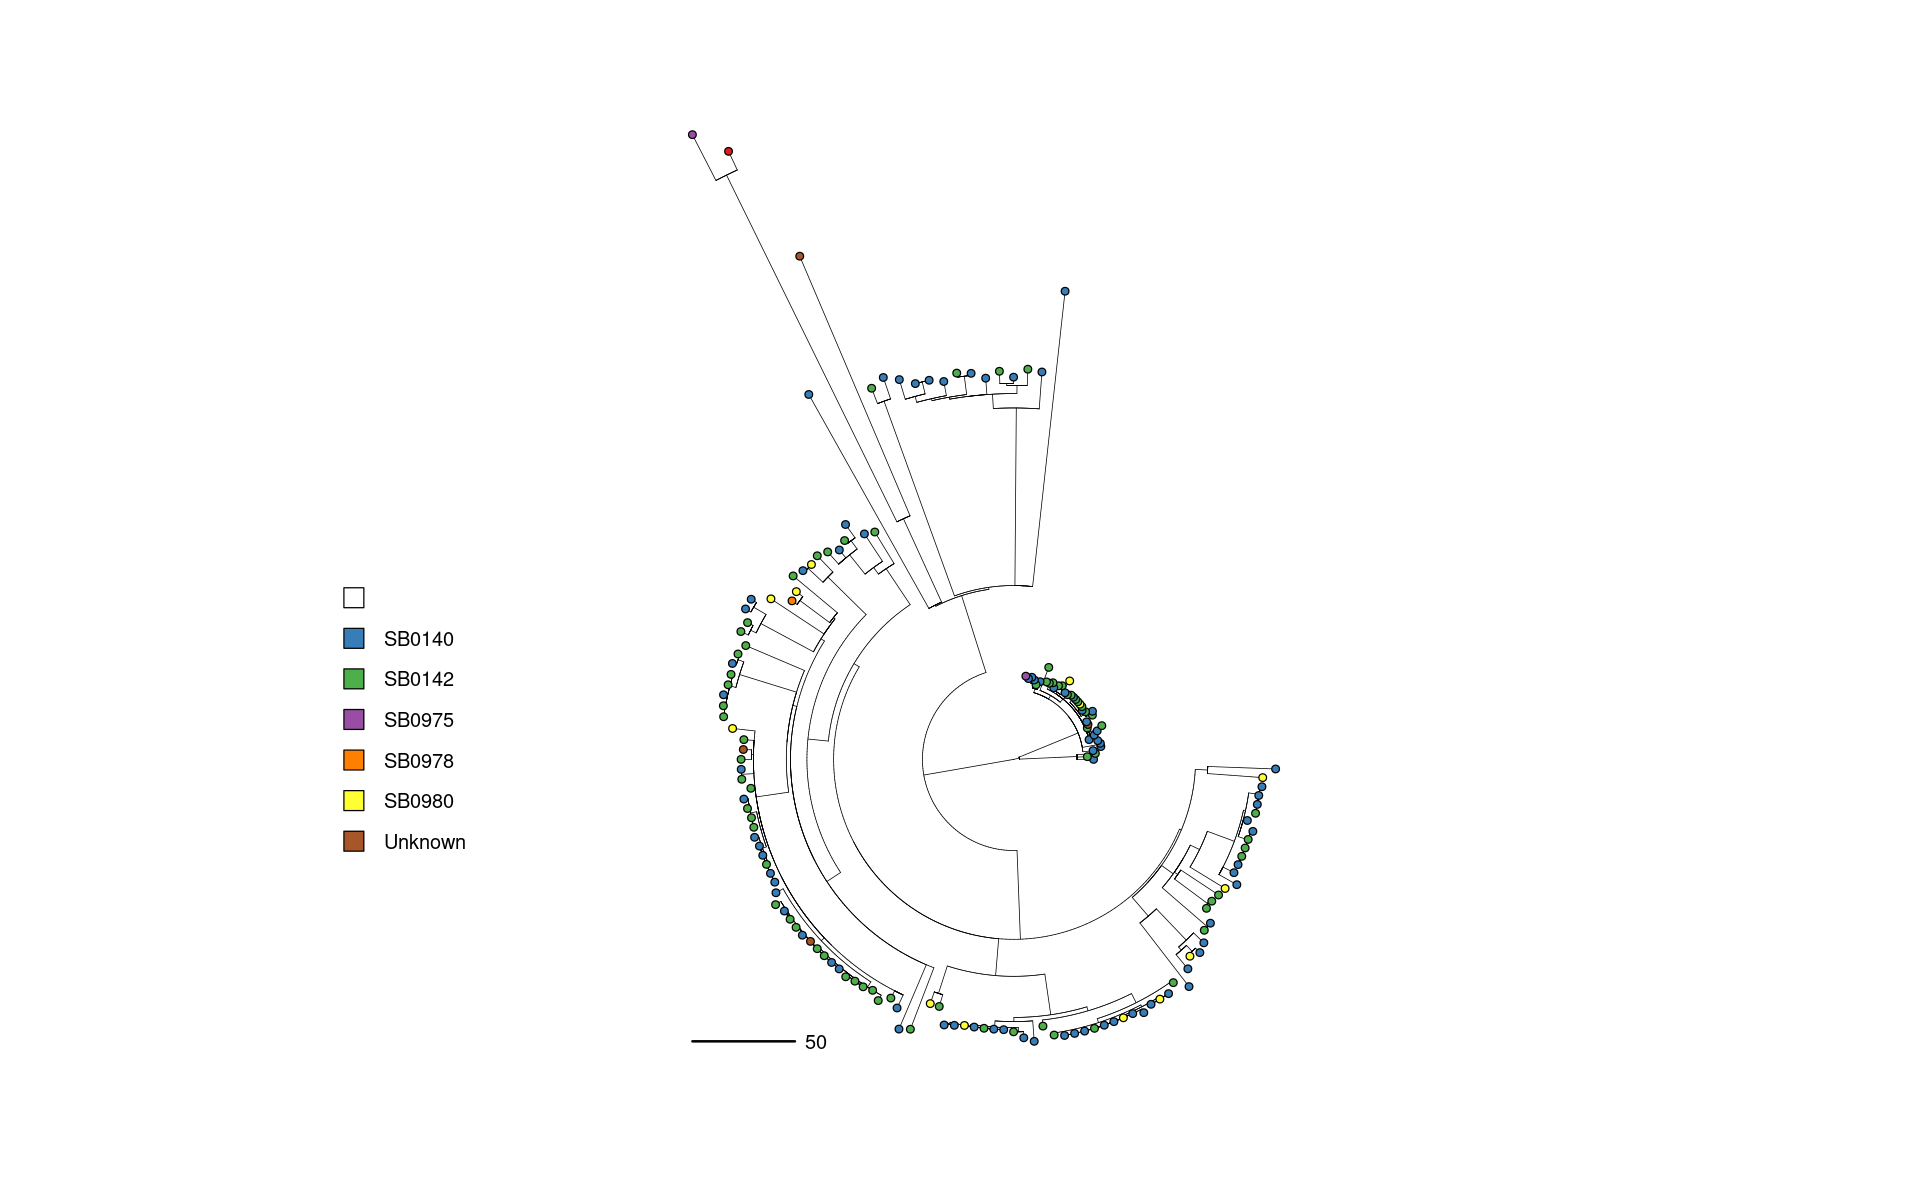

In [221]:
#ireland
tips<-row.names(meta[meta$county=='Monaghan',])
itree <- keep.tip(mltree, tips)
itree <- drop.tip(itree, c('19-2438','19-4281','461'))
plot_tree(itree,meta,column='SB',type='fan')

## Ireland tree

    Other    SB0054    SB0130    SB0140    SB0142    SB0980   Unknown 
"#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628" 


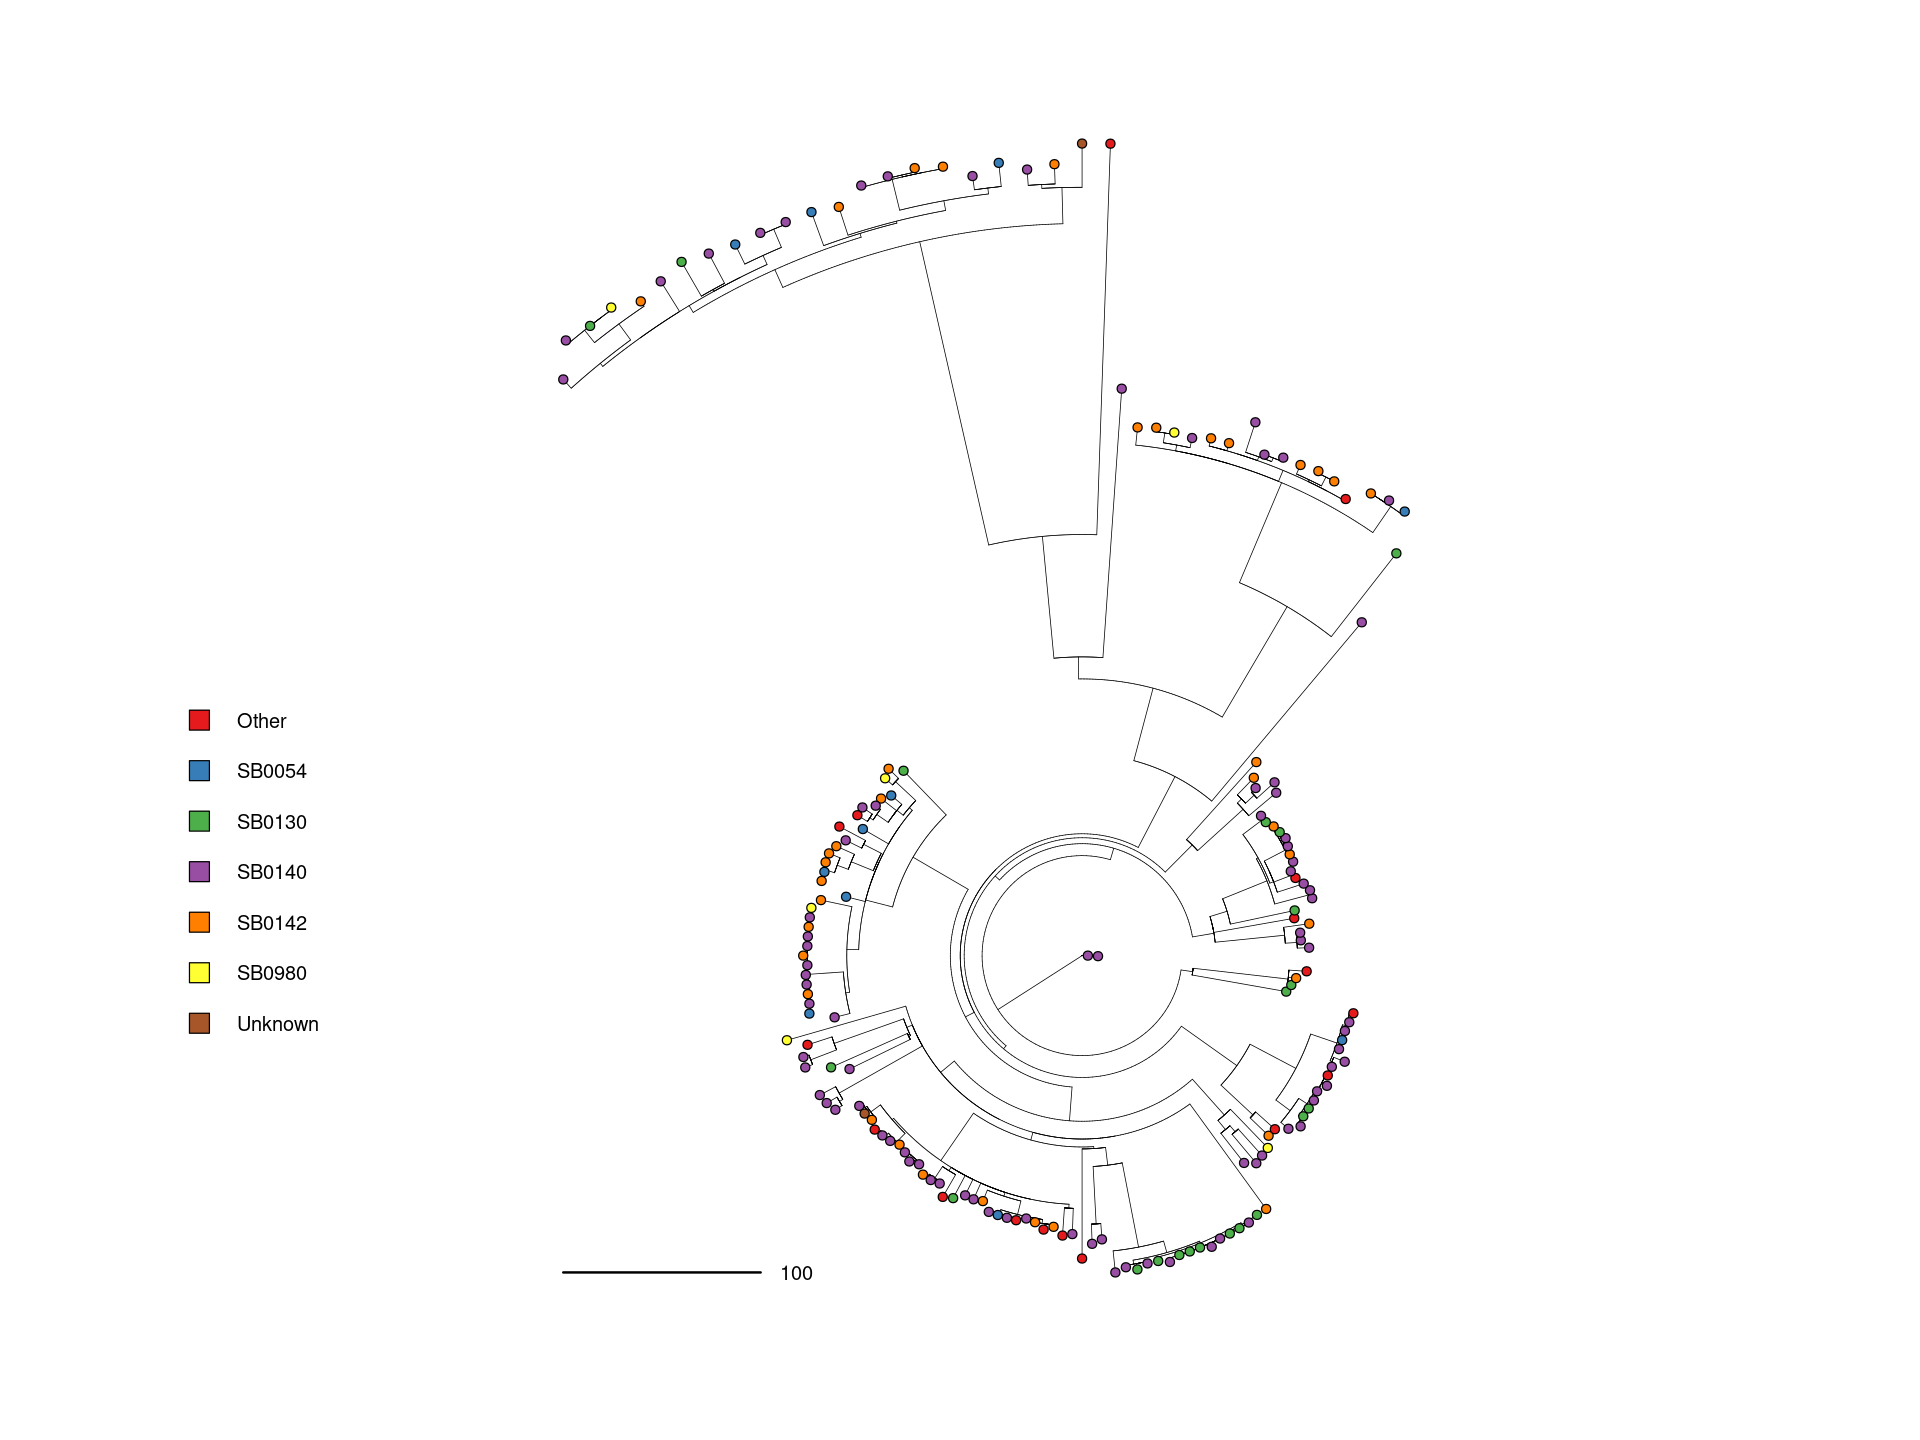

In [47]:
randtips<-sample(mltree2$tip.label,180)
#tips<-row.names(meta[isin(meta$county, c('Monaghan')),])
itree<-keep.tip(mltree2,randtips)
plot_tree(itree,meta2,title='',column='SB1', type='fan')

In [48]:
isin(meta$county, c('Monaghan'))

ERROR: Error in isin(meta$county, c("Monaghan")): could not find function "isin"
